In [ ]:
#install required library first
! pip install -q kaggle 
from google.colab import files
files.upload() #upload api keys from kaggle, use your own api keys

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [3]:
# Download dataset from kaggle
! kaggle datasets download -d abdalnassir/chicken-breeds

 71% 9.00M/12.6M [00:00<00:00, 52.0MB/s]
100% 12.6M/12.6M [00:00<00:00, 61.9MB/s]


In [ ]:
! mkdir chicken
! unzip /content/chicken-breeds.zip -d chicken

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
import zipfile,os 
import pandas as pd

In [6]:
!pip install split_folders tqdm #for dataset train test split 
!pip install seedir #for directory treeview 
import splitfolders #for easier dataset splitting  
import seedir as sd #for directory tree viewer

     |████████████████████████████████| 115 kB 5.0 MB/s 
     |████████████████████████████████| 170 kB 35.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=4e97d23ac28e94d3eb055f8a8283d16870f9485a61d0684cfdfd6933ed1a1fe9
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [7]:
#target directory
target_dir = '/content/chicken/Chicken Breeds'

In [8]:
sd.seedir(target_dir, style='lines', itemlimit=4, depthlimit=3)

Chicken Breeds/
├─validation/
│ ├─American Gamefowl/
│ │ ├─1601215625189.jpg
│ │ ├─confidence-0.78431374-time-1620459501450.jpg
│ │ ├─1600759801253.jpg
│ │ └─1607015050031.jpg
│ ├─Sapphire Gem/
│ │ ├─confidence-0.15686275-time-1610017663124.jpg
│ │ ├─confidence-0.11372549-time-1620862674849.jpg
│ │ ├─confidence-0.13725491-time-1622065969154.jpg
│ │ └─confidence-0.06666667-time-1610017096358.jpg
│ ├─Chick/
│ │ ├─confidence-0.9882353-time-1615663493413.jpg
│ │ ├─confidence-0.83137256-time-1615221686396.jpg
│ │ ├─confidence-0.68235296-time-1614380356677.jpg
│ │ └─confidence-0.8784314-time-1614741426295.jpg
│ └─Wyandotte/
│   ├─wyandotte-bantam-chicken-silver-laced-260nw-552273388.jpg
│   ├─wyandotte-chicken-front-white-background-260nw-1881868708.jpg
│   ├─wyandotte-chicken-front-white-background-260nw-1881868720.jpg
│   └─wyandotte-cockerel-hen-garden-260nw-1704771886.jpg
└─training/
  ├─American Gamefowl/
  │ ├─confidence-0.11764706-time-1620458942192.jpg
  │ ├─confidence-0.12941177-tim

In [9]:
#count total files in train and validation set 
split_path = '/content/chicken/Chicken Breeds/'
folder_names = ['Chick', 'Speckled Sussex', 'American Gamefowl', 'Sapphire Gem', 'Wyandotte']

original_files ={}
train_files = {}
val_files = {}

for i in folder_names:
    train_files[i] = len(os.listdir(split_path+'training/'+i))
    val_files[i] = len(os.listdir(split_path+'validation/'+i))

    
#convert to dataframe for easier comprehension
result_split = pd.DataFrame()
result_split = result_split.append(train_files, ignore_index=True)
result_split = result_split.append(val_files, ignore_index=True)
result_split['total'] = result_split.sum(axis=1)
result_split['type'] = ['train', 'val']
result_split = result_split[['type', 'Chick', 'Speckled Sussex', 'American Gamefowl', 'Sapphire Gem', 'Wyandotte', 'total']]
print(result_split)

    type  Chick  Speckled Sussex  ...  Sapphire Gem  Wyandotte  total
0  train  164.0            164.0  ...         164.0      200.0  860.0
1    val   36.0             36.0  ...          36.0       59.0  203.0

[2 rows x 7 columns]


Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)
Image shape (224, 224, 3)


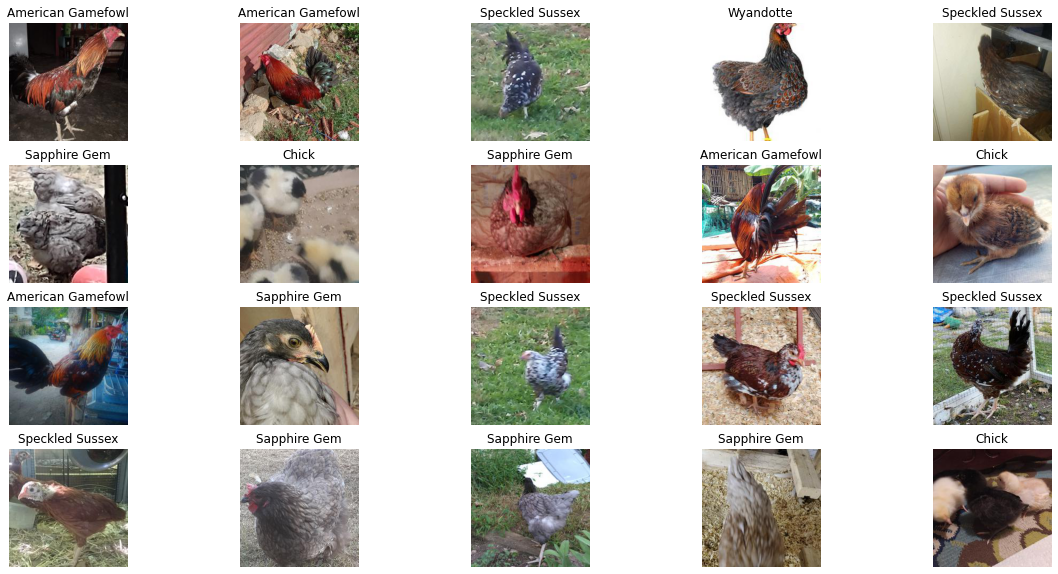

In [10]:
#Display random images
import random

#function for displaying 1 random image and image shape
def one_random_image(target_path, target_class): 
  target_fold = target_path + target_class
  random_image = random.sample(os.listdir(target_fold), 1)
  image = mpimg.imread(target_fold+'/'+random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {image.shape}")

  return image

#Function for displaying group of random images and shape
def group_random_images( target_path, figure_size=(20, 10), group=20):
  plt.figure(figsize=figure_size)
  for i in range(group):
    plt.subplot(4, 5, i+1)
    class_name = random.choice(['Chick', 'Speckled Sussex', 'American Gamefowl', 'Sapphire Gem', 'Wyandotte'])
    image = one_random_image(target_path=target_path, target_class=class_name)
  
group_random_images = group_random_images(target_path='/content/chicken/Chicken Breeds/training/')

In [11]:
## saving train and validation path into variable
train_set = '/content/chicken/Chicken Breeds/training'
val_set = '/content/chicken/Chicken Breeds/validation'

In [12]:
#image augmentation
#training set rescale and augmenting
train_aug = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

#only rescale the validation set, dont do the augmentation step for validation set, it might cause bias
valid_aug = ImageDataGenerator(rescale=1./255)

In [13]:
#train and validation data generator
#batch size 64
#class mode is categorical since we have 5 classes
train_generator = train_aug.flow_from_directory(
        train_set,  
        target_size=(128, 128),  
        class_mode='categorical')

validation_generator = valid_aug.flow_from_directory(
        val_set, 
        target_size=(128, 128), 
        class_mode='categorical')

Found 860 images belonging to 5 classes.
Found 203 images belonging to 5 classes.


In [14]:
#building model 
#using 2 hidden layer 
#using softmax in output layer instead of sigmoid because there are 5 outcomes
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (128,128,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128,(3,3), activation= 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(5, activation= 'softmax') 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [15]:

# Adding lose function and optimizer
#categorical since we have 5 classes
#using adam 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# callback
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.85):
      self.model.stop_training = True
      print("\nValidation Accuracy of the model >= 85%")
early_stop = myCallback()

In [17]:
# Training the model
history = model.fit(
    train_generator,
    epochs=40, 
    validation_data = validation_generator,
    verbose = 1,
    callbacks=[early_stop]
)

Epoch 1/40
27/27 [==============================] - 31s 1s/step - loss: 1.6209 - accuracy: 0.2349 - val_loss: 1.4915 - val_accuracy: 0.3103
Epoch 2/40
27/27 [==============================] - 30s 1s/step - loss: 1.4165 - accuracy: 0.3779 - val_loss: 1.1029 - val_accuracy: 0.6256
Epoch 3/40
27/27 [==============================] - 30s 1s/step - loss: 1.1216 - accuracy: 0.5651 - val_loss: 0.8289 - val_accuracy: 0.6847
Epoch 4/40
27/27 [==============================] - 30s 1s/step - loss: 0.9567 - accuracy: 0.6395 - val_loss: 0.6316 - val_accuracy: 0.7783
Epoch 5/40
27/27 [==============================] - 30s 1s/step - loss: 0.9161 - accuracy: 0.6500 - val_loss: 1.0222 - val_accuracy: 0.6650
Epoch 6/40
27/27 [==============================] - 30s 1s/step - loss: 0.8265 - accuracy: 0.6767 - val_loss: 0.7406 - val_accuracy: 0.7488
Epoch 7/40
27/27 [==============================] - 30s 1s/step - loss: 0.7734 - accuracy: 0.7186 - val_loss: 0.6678 - val_accuracy: 0.7389
Epoch 8/40
27/27 [==

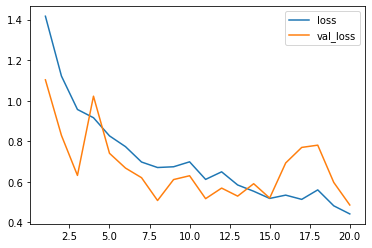

In [18]:
#loss 
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
plt.show()

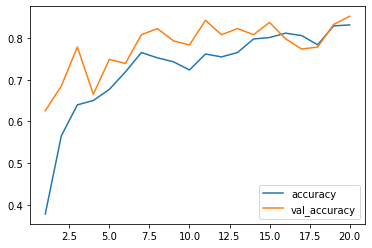

In [19]:
#accuracy 
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [20]:
#Best validation loss and accuracy score
print(("Best Validation Loss: {:0.2f}" +"\nBest Validation Accuracy: {:0.2f}").format(history_df['val_loss'].min(), history_df['val_accuracy'].max()))

Best Validation Loss: 0.49
Best Validation Accuracy: 0.85


In [23]:
# Save the trained model 
model.save('my_model.h5')

In [24]:
# check if the saved model works
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

Saving unnamed.jpg to unnamed.jpg
unnamed.jpg


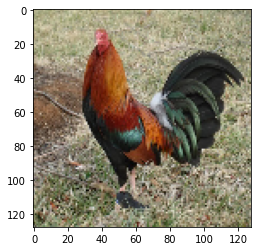

In [30]:
#try to predict
upload_file = files.upload()
 
for file_name in upload_file.keys():
 
  # predicting images
  file_path = file_name
  img = image.load_img(file_path, target_size=(128,128))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predict = new_model.predict(images, batch_size=10)
  print(file_name)
  predict

In [32]:
#try the prediction
if predict[0][0] == 1.:
  print('American Gamefowl')
elif predict[0][1] == 1.:
  print('Chick')
elif predict[0][2] == 1.:
  print('Sapphire Gem')
elif predict[0][3] == 1.:
  print('Speckled Sussex')    
else:
  print('Wyandotte')


American Gamefowl
